## Dynamics

In [1]:
import sys
sys.path.append('./modules')
from tqdm import tqdm as progress  #Per la progress bar

from modules import state
from modules import plot

import numpy as np
from matplotlib import pyplot as plt

In [2]:
CONSTANTS = {
    'DT': 0.05, #secondi
    'MAX_DISTANCE' : 10, # angstrom
    'TOTAL_PARTICLES' : 50,
    'MAX_TIME_STEPS' : 1000,
    'MASS' : 39.95,  # argon amu
    'TEMPERATURE' : 1000,  # K
    'EPSILON' : 0.0105, # eV
    'SIGMA' : 3.44  # angstrom
}


sample, energies = state.init(CONSTANTS) # Inizializzazione sample, energy con le costanti

for time in progress(range(CONSTANTS['MAX_TIME_STEPS'])): # Quindi faccio un ciclo per MAX_TIME_STEPS volte e in ogni iterazione esegue le seguenti operazion

    current_state  = state.get(sample, CONSTANTS)
    current_state, _ = state.collisions(current_state, CONSTANTS)
    state.update(sample, current_state, energies, CONSTANTS)

100%|███████████████████████████████████████| 1000/1000 [01:00<00:00, 16.54it/s]


## Plots

In [3]:
def lj_potential(positions, epsilon, sigma):
    for n, position in enumerate(positions):
        positions[n] = 0.9*sigma if position < 0.9*sigma else position
    return [
        4*epsilon*((sigma/position)**12 - (sigma/position)**6)
        for position in positions
    ]

def lj_force(positions, epsilon, sigma):
    for n, position in enumerate(positions):
        positions[n] = 0.9*sigma if position < 0.9*sigma else position # Per evitare che il potenziale diventi infinito quando la distanza tra le particelle si avvicina a zero
    return [
        24*epsilon*((sigma**6)/(position**13))*(position**6 - 2*sigma**6)
        for position in positions
    ]

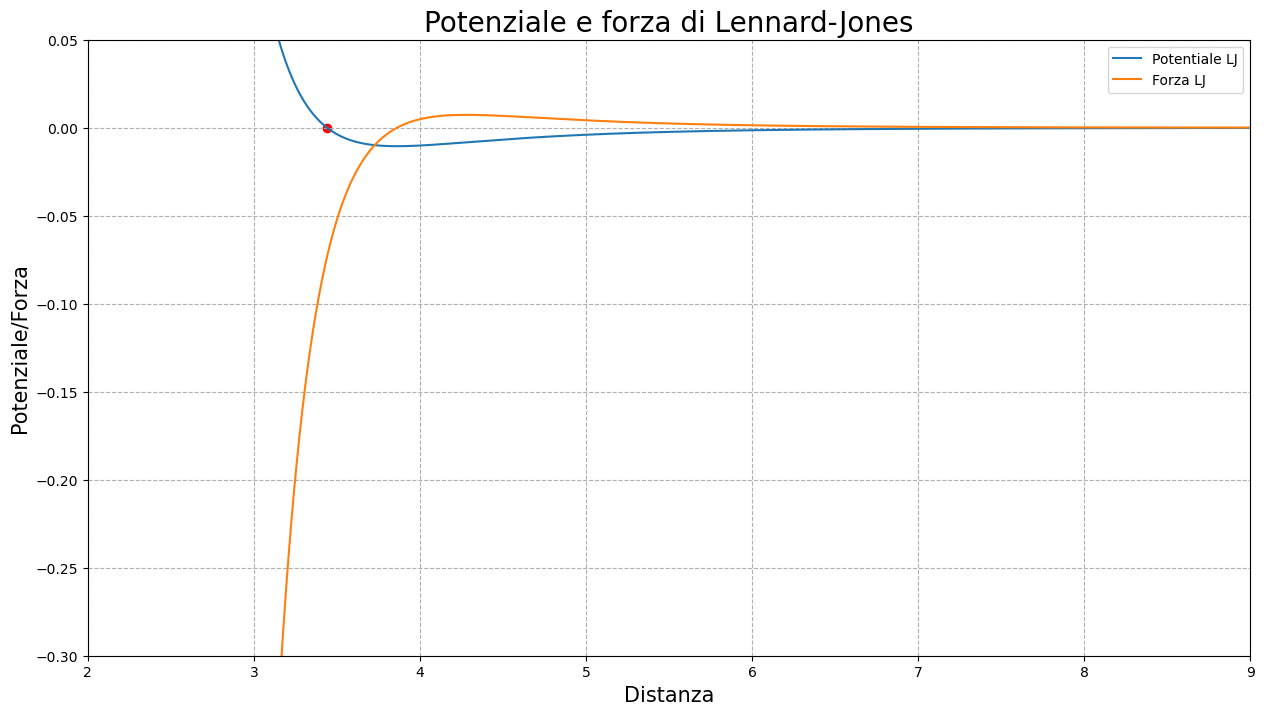

In [37]:
r = np.linspace(-3, 12, 10000)
plt.figure(figsize=(15,8))
plt.plot(r, lj_potential(r, CONSTANTS['EPSILON'], CONSTANTS['SIGMA']), label='Potentiale LJ')
plt.plot(r, lj_force(r, CONSTANTS['EPSILON'], CONSTANTS['SIGMA']), label='Forza LJ')
plt.scatter(CONSTANTS['SIGMA'], 0, c='r')
plt.legend()
plt.title('Potenziale e forza di Lennard-Jones', fontsize=20)
plt.grid(linestyle='--')
plt.xlim(2, 5)
plt.ylim(-0.3, 0.05)
plt.xticks(np.arange(2, 10, 1))
plt.xlabel('Distanza', fontsize=15)
plt.ylabel('Potenziale/Forza', fontsize=15)
plt.show()

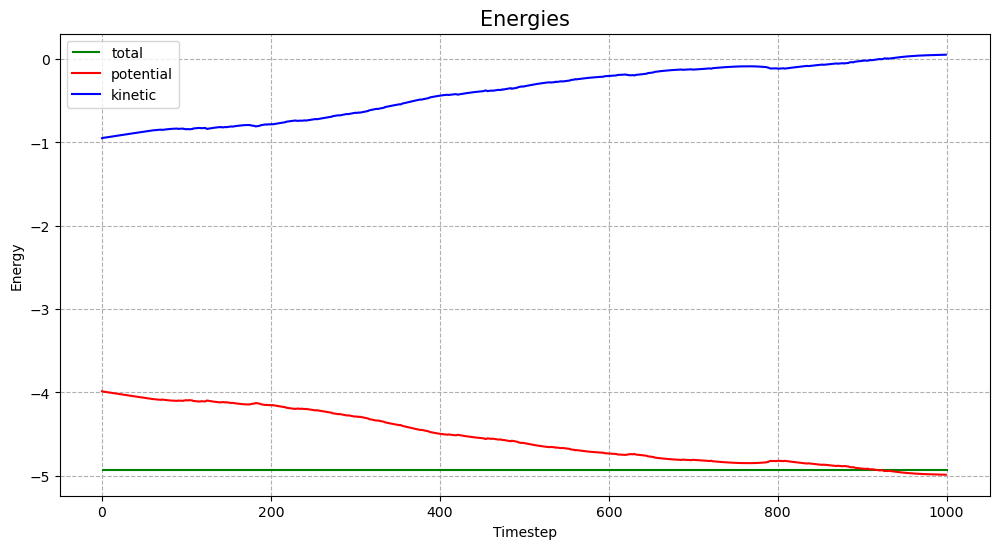

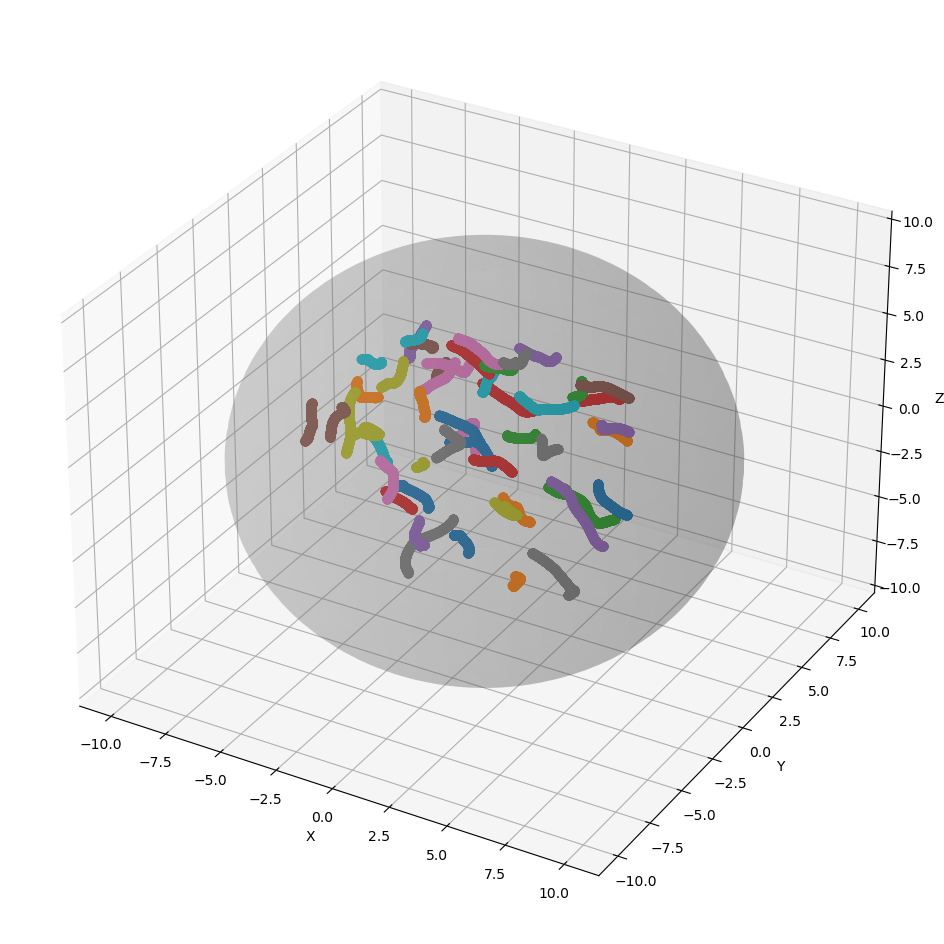

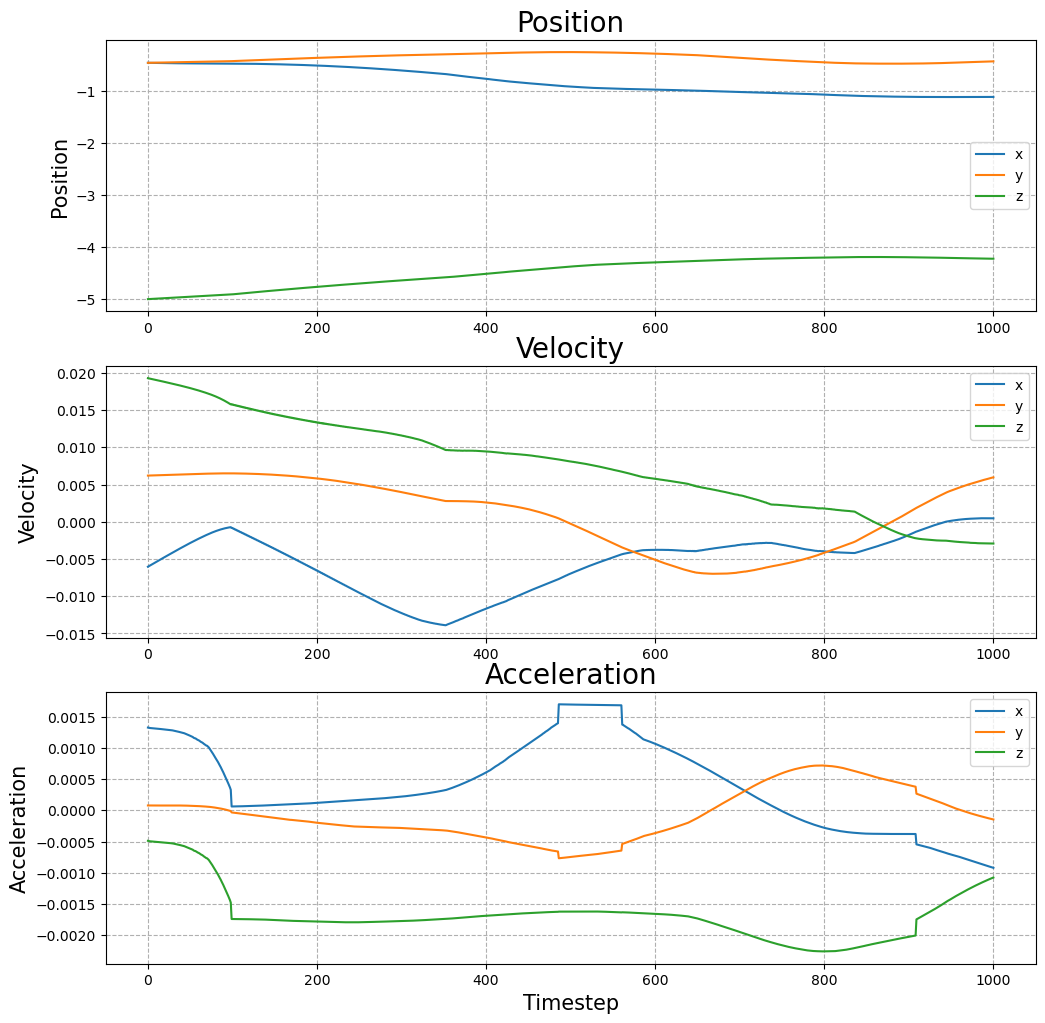

In [42]:
plot.energy(energies)
plot.particle_trajectory(sample, CONSTANTS['MAX_DISTANCE'])
plot.dynamic(sample, 0)